<a href="https://colab.research.google.com/github/Saritha-242020/Python-Project/blob/main/ABC_Company_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ABC Company Dataset.csv.csv to ABC Company Dataset.csv.csv


#Preprocessing

1.Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [5]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded['ABC Company Dataset.csv.csv']))  # Replace with exact file name

# Check basic info
print(df.info())

# Replace 'height' column with random values
np.random.seed(42)
df['height'] = np.random.randint(150, 181, size=len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None


# Anaysis Tasks & Graphical Representation

2. 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

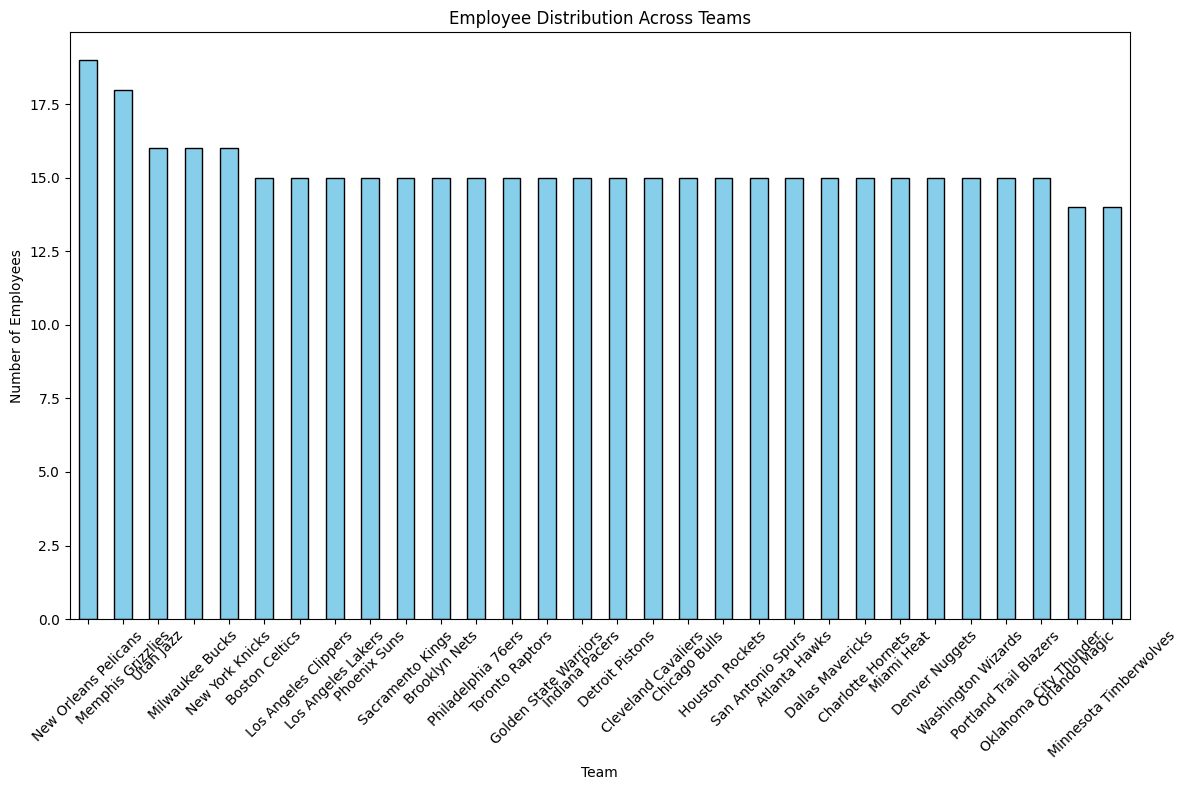

In [12]:
team_counts = df['Team'].value_counts()
team_percentages = team_counts / len(df) * 100

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
team_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Employee Distribution Across Teams')
plt.ylabel('Number of Employees')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.2. Segregate employees based on their positions within the company.

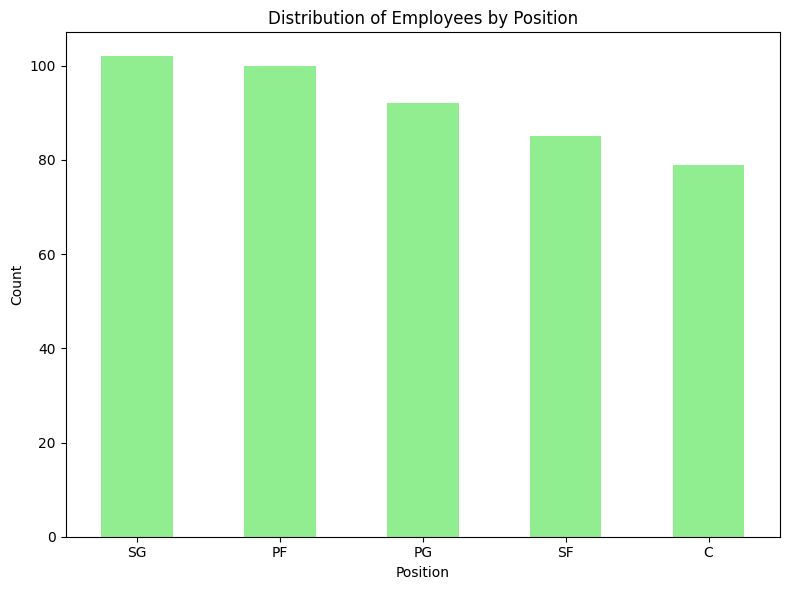

In [20]:
position_counts = df['Position'].value_counts()

plt.figure(figsize=(8, 6))
position_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Employees by Position')
plt.ylabel('Count')
plt.xlabel('Position')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


2.3. Identify the predominant age group among employees.

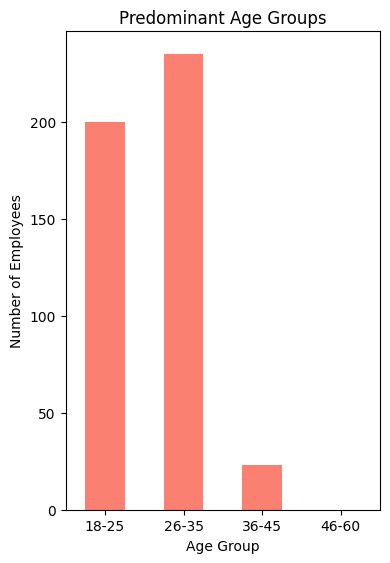

In [23]:
age_bins = [18, 25, 35, 45, 60]
age_labels = ['18-25', '26-35', '36-45', '46-60']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_group_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(4, 6))
age_group_counts.plot(kind='bar', color='salmon')
plt.title('Predominant Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


2.4. Discover which team and position have the highest salary expenditure.

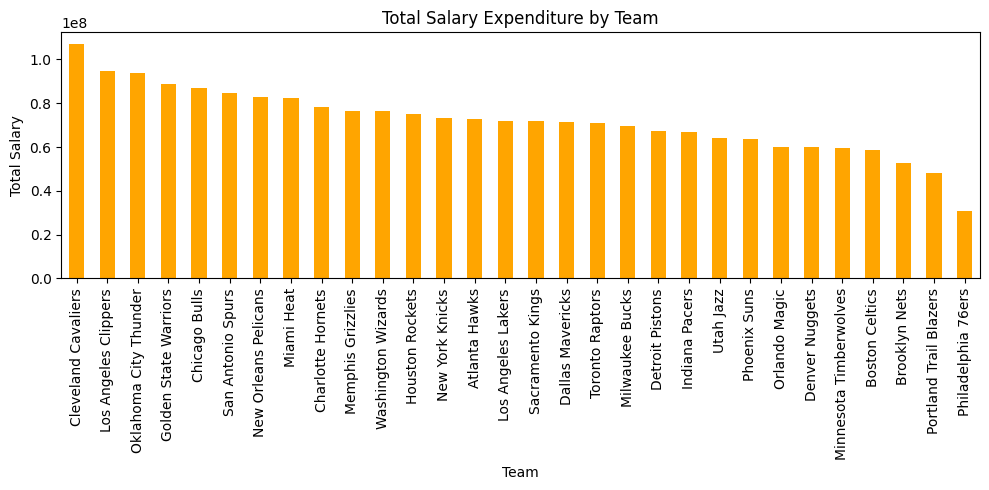

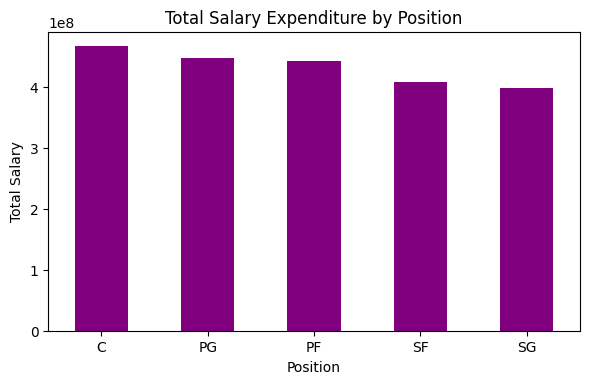

In [30]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
team_salary.plot(kind='bar', color='orange')
plt.title('Total Salary Expenditure by Team')
plt.ylabel('Total Salary')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
position_salary.plot(kind='bar', color='purple')
plt.title('Total Salary Expenditure by Position')
plt.ylabel('Total Salary')
plt.xlabel('Position')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


2.5. Investigate if there's any correlation between age and salary, and represent it visually.

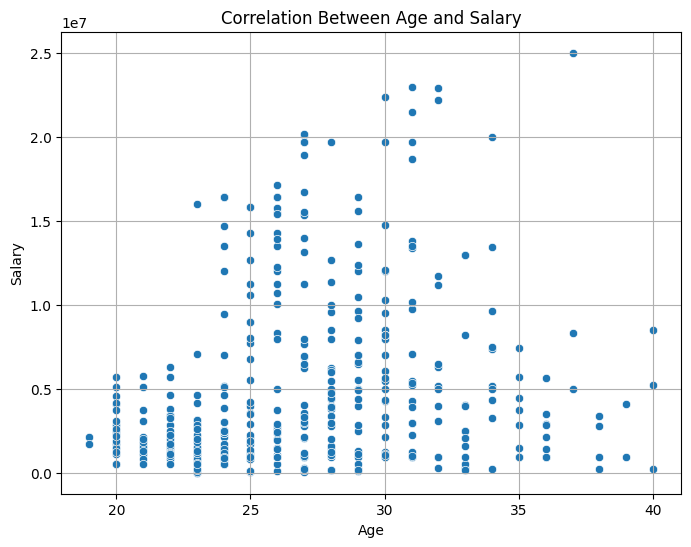

Correlation between age and salary: 0.21


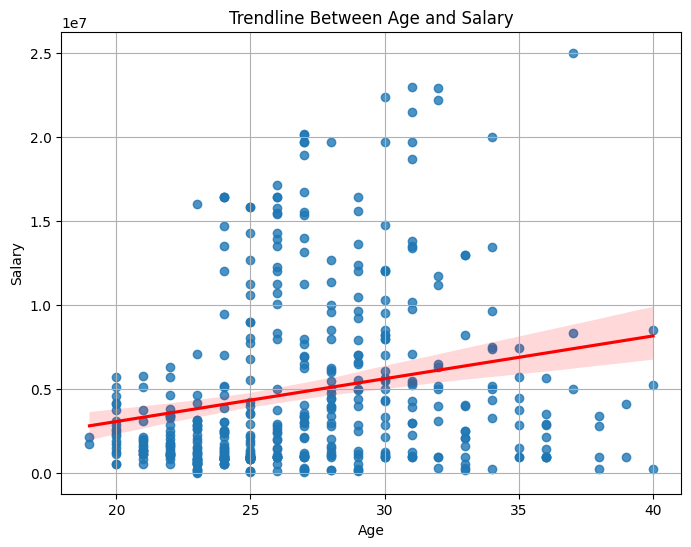

In [42]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation:.2f}")

# Adding trendline
plt.figure(figsize=(8, 6))
plt.title('Trendline Between Age and Salary')
sns.regplot(x='Age', y='Salary', data=df, scatter=True, line_kws={"color": "red"})
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()